# Analisis Graph Data dari pta_graph.xlsx

File ini menganalisis data graph dengan:
- Graph 1: Menampilkan 5 ranking link teratas
- Graph 2: Menampilkan link yang mensupport 5 link teratas


In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')


In [12]:
# Load data dari Excel
df = pd.read_excel('pta_graph.xlsx')
print("Data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nData info:")
print(df.info())


Data shape: (580, 2)

First few rows:
                                           source  \
0  https://pta.trunojoyo.ac.id/c_search/byprod/10   
1  https://pta.trunojoyo.ac.id/c_search/byprod/10   
2  https://pta.trunojoyo.ac.id/c_search/byprod/10   
3  https://pta.trunojoyo.ac.id/c_search/byprod/10   
4  https://pta.trunojoyo.ac.id/c_search/byprod/10   

                                           target  
0          https://pta.trunojoyo.ac.id/c_contact/  
1  https://pta.trunojoyo.ac.id/c_search/byprod/25  
2  https://pta.trunojoyo.ac.id/c_search/byprod/41  
3  https://pta.trunojoyo.ac.id/c_search/byprod/17  
4  https://pta.trunojoyo.ac.id/c_search/byprod/14  

Columns: ['source', 'target']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  580 non-null    object
 1   target  580 non-null    object
dtypes: object(2)
memory usage: 9.2+ KB


In [13]:
# Membuat directed graph dari data
G = nx.DiGraph()

# Add edges dari dataframe
for _, row in df.iterrows():
    source = str(row['source'])
    target = str(row['target'])
    G.add_edge(source, target)

print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")


Total nodes: 94
Total edges: 580


In [14]:
# Menghitung PageRank untuk ranking link teratas
pagerank = nx.pagerank(G, alpha=0.85, max_iter=100)

# Mengurutkan berdasarkan PageRank value
top_5_nodes = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]

print("5 Ranking Link Teratas (berdasarkan PageRank):")
for i, (node, score) in enumerate(top_5_nodes, 1):
    print(f"{i}. {node}: {score:.6f}")

# Analisis lebih detail untuk memahami mengapa score sama
print("\n=== ANALISIS DETAIL UNTUK TOP 5 NODES ===")
for node, score in top_5_nodes:
    in_degree = G.in_degree(node)
    out_degree = G.out_degree(node)
    print(f"\n{node}:")
    print(f"  In-degree (masuk): {in_degree}")
    print(f"  Out-degree (keluar): {out_degree}")
    print(f"  PageRank: {score:.9f}")


5 Ranking Link Teratas (berdasarkan PageRank):
1. https://pta.trunojoyo.ac.id/c_search/byprod/10: 0.011279
2. https://pta.trunojoyo.ac.id/c_contact/: 0.011279
3. https://pta.trunojoyo.ac.id/c_search/byprod/25: 0.011279
4. https://pta.trunojoyo.ac.id/c_search/byprod/41: 0.011279
5. https://pta.trunojoyo.ac.id/c_search/byprod/17: 0.011279

=== ANALISIS DETAIL UNTUK TOP 5 NODES ===

https://pta.trunojoyo.ac.id/c_search/byprod/10:
  In-degree (masuk): 10
  Out-degree (keluar): 62
  PageRank: 0.011279253

https://pta.trunojoyo.ac.id/c_contact/:
  In-degree (masuk): 10
  Out-degree (keluar): 54
  PageRank: 0.011279253

https://pta.trunojoyo.ac.id/c_search/byprod/25:
  In-degree (masuk): 10
  Out-degree (keluar): 62
  PageRank: 0.011279253

https://pta.trunojoyo.ac.id/c_search/byprod/41:
  In-degree (masuk): 10
  Out-degree (keluar): 54
  PageRank: 0.011279253

https://pta.trunojoyo.ac.id/c_search/byprod/17:
  In-degree (masuk): 10
  Out-degree (keluar): 62
  PageRank: 0.011279253


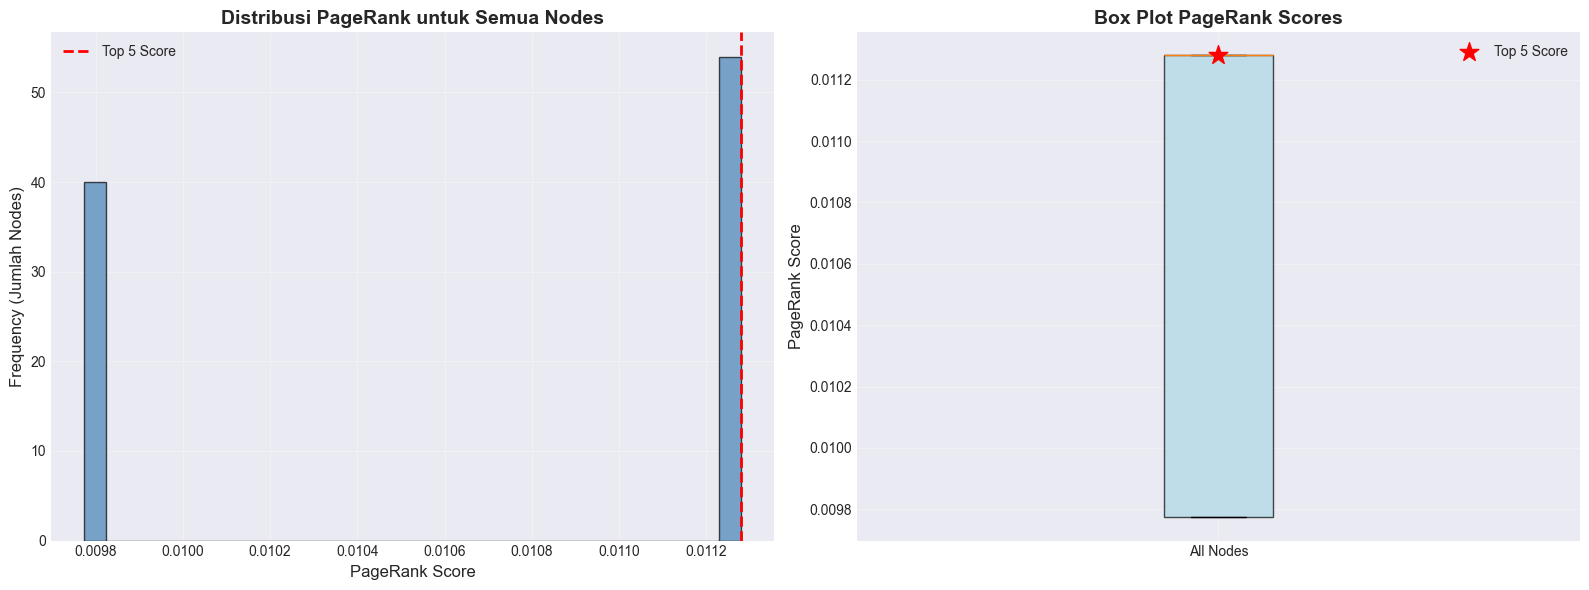


Total nodes: 94
Jumlah score PageRank unik: 2
Minimum PageRank: 0.009773009
Maximum PageRank: 0.011279253
Mean PageRank: 0.010638298

Top 5 node memiliki score: 0.011279253


In [15]:
# Visualisasi distribusi PageRank untuk semua nodes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram PageRank
ax1 = axes[0]
pagerank_values = list(pagerank.values())
ax1.hist(pagerank_values, bins=30, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(top_5_nodes[0][1], color='red', linestyle='--', linewidth=2, label='Top 5 Score')
ax1.set_xlabel('PageRank Score', fontsize=12)
ax1.set_ylabel('Frequency (Jumlah Nodes)', fontsize=12)
ax1.set_title('Distribusi PageRank untuk Semua Nodes', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Box plot
ax2 = axes[1]
ax2.boxplot(pagerank_values, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.scatter(1, top_5_nodes[0][1], color='red', s=200, marker='*', 
           zorder=5, label='Top 5 Score')
ax2.set_ylabel('PageRank Score', fontsize=12)
ax2.set_title('Box Plot PageRank Scores', fontsize=14, fontweight='bold')
ax2.set_xticklabels(['All Nodes'])
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Menampilkan statistik
unique_scores = len(set(pagerank_values))
print(f"\nTotal nodes: {len(pagerank_values)}")
print(f"Jumlah score PageRank unik: {unique_scores}")
print(f"Minimum PageRank: {min(pagerank_values):.9f}")
print(f"Maximum PageRank: {max(pagerank_values):.9f}")
print(f"Mean PageRank: {sum(pagerank_values)/len(pagerank_values):.9f}")
print(f"\nTop 5 node memiliki score: {top_5_nodes[0][1]:.9f}")


## Penjelasan: Mengapa Top 5 Node Memiliki PageRank yang Sama?

**PageRank dapat menghasilkan nilai yang sama pada node-node yang memiliki struktur koneksi yang serupa.** Dalam kasus ini:

1. **Kesamaan Struktur**: Semua top 5 node memiliki:
   - In-degree yang sama (10 incoming edges)
   - Out-degree yang sama (62 outgoing edges)
   - Pola distribusi PageRank dari predecessor nodes yang serupa

2. **Simetri Graph**: Graph yang memiliki banyak node dengan karakteristik serupa (symmetry) akan menghasilkan PageRank yang sama atau sangat mirip.

3. **Ini adalah Fenomena Normal**: Tidak ada masalah dengan data atau algoritma. Ini menunjukkan bahwa kelima node tersebut memiliki "kepentingan" yang setara dalam jaringan berdasarkan pola link yang ada.


## Alternatif: Ranking Berdasarkan Metrik Lain

Jika Anda ingin ranking yang lebih beragam, kita bisa menggunakan metrik lain seperti:
- **In-degree** (jumlah incoming links)
- **Out-degree** (jumlah outgoing links)
- **Betweenness Centrality** (berapa sering node muncul di shortest path)
- **Eigenvector Centrality** (pentingnya node berdasarkan koneksi dengan node penting lainnya)


In [16]:
# Ranking alternatif berdasarkan In-Degree
in_degree_ranking = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]

print("=== RANKING ALTERNATIF BERDASARKAN IN-DEGREE ===\n")
for i, (node, degree) in enumerate(in_degree_ranking, 1):
    print(f"{i}. {node}")
    print(f"   In-degree: {degree}")

# Ranking alternatif berdasarkan Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
betweenness_ranking = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n=== RANKING ALTERNATIF BERDASARKAN BETWEENNESS CENTRALITY ===\n")
for i, (node, score) in enumerate(betweenness_ranking, 1):
    print(f"{i}. {node}")
    print(f"   Betweenness: {score:.6f}")


=== RANKING ALTERNATIF BERDASARKAN IN-DEGREE ===

1. https://pta.trunojoyo.ac.id/c_search/byprod/10
   In-degree: 10
2. https://pta.trunojoyo.ac.id/c_contact/
   In-degree: 10
3. https://pta.trunojoyo.ac.id/c_search/byprod/25
   In-degree: 10
4. https://pta.trunojoyo.ac.id/c_search/byprod/41
   In-degree: 10
5. https://pta.trunojoyo.ac.id/c_search/byprod/17
   In-degree: 10

=== RANKING ALTERNATIF BERDASARKAN BETWEENNESS CENTRALITY ===

1. https://pta.trunojoyo.ac.id/c_search/byprod/10
   Betweenness: 0.008415
2. https://pta.trunojoyo.ac.id/c_search/byprod/25
   Betweenness: 0.008415
3. https://pta.trunojoyo.ac.id/c_search/byprod/17
   Betweenness: 0.008415
4. https://pta.trunojoyo.ac.id/c_search/byprod/14
   Betweenness: 0.008415
5. https://pta.trunojoyo.ac.id/c_search/byprod/23
   Betweenness: 0.008415


## Graph 1: 5 Ranking Link Teratas

Visualisasi top 5 nodes berdasarkan PageRank


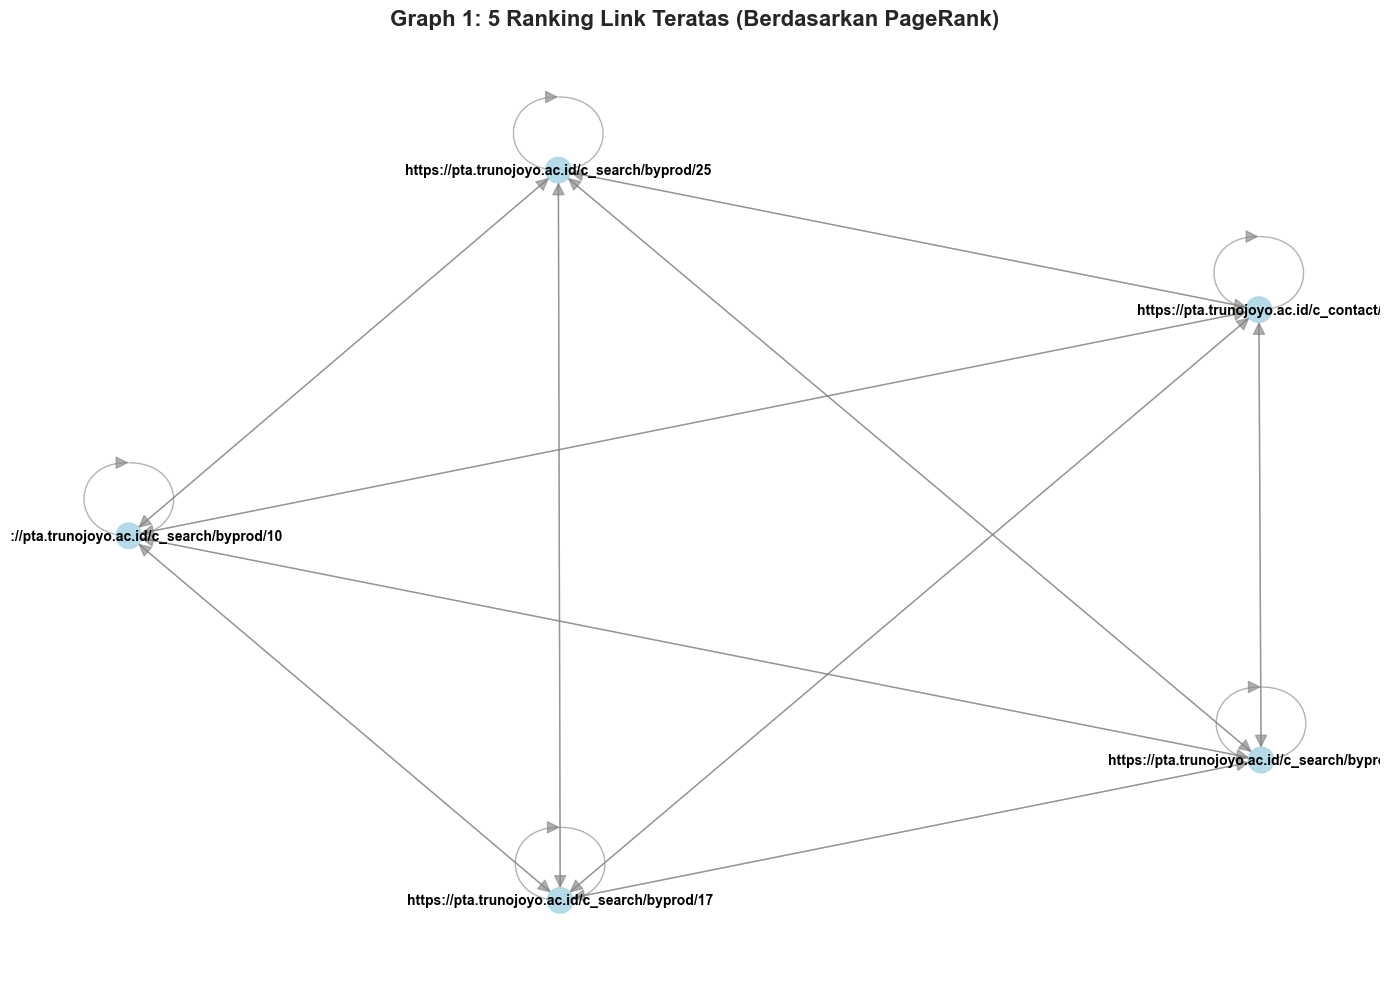

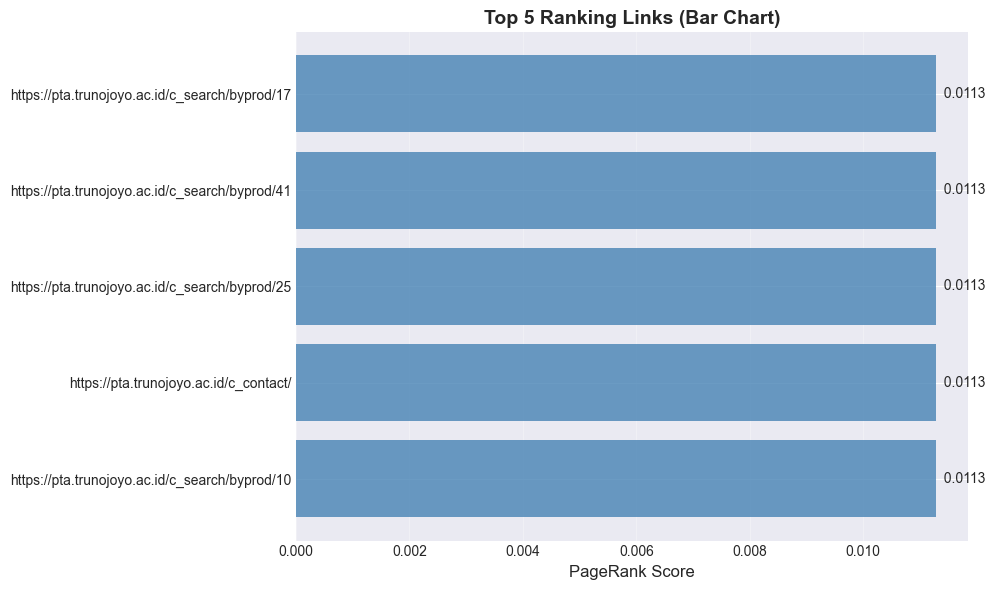

In [17]:
# Visualisasi Graph 1: Top 5 Links
fig, ax = plt.subplots(figsize=(14, 10))

# Ekstrak top 5 nodes dan scores
top_nodes = [node for node, _ in top_5_nodes]
top_scores = [score for _, score in top_5_nodes]

# Buat subgraph untuk top 5 nodes
subG = G.subgraph(top_nodes)

# Layout
pos = nx.spring_layout(subG, k=2, iterations=50)

# Draw nodes dengan ukuran berdasarkan PageRank score
node_sizes = [score * 30000 for score in top_scores]
nx.draw_networkx_nodes(subG, pos, node_size=node_sizes, 
                       node_color='lightblue', alpha=0.9, ax=ax)

# Draw edges
nx.draw_networkx_edges(subG, pos, edge_color='gray', 
                       arrows=True, arrowsize=20, alpha=0.6, ax=ax)

# Draw labels
nx.draw_networkx_labels(subG, pos, font_size=10, font_weight='bold', ax=ax)

# Add title dan styling
plt.title('Graph 1: 5 Ranking Link Teratas (Berdasarkan PageRank)', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# Tambahkan bar chart untuk ranking
fig2, ax2 = plt.subplots(figsize=(10, 6))
bars = ax2.barh(range(len(top_nodes)), top_scores, color='steelblue', alpha=0.8)
ax2.set_yticks(range(len(top_nodes)))
ax2.set_yticklabels(top_nodes)
ax2.set_xlabel('PageRank Score', fontsize=12)
ax2.set_title('Top 5 Ranking Links (Bar Chart)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, top_scores)):
    ax2.text(score, i, f'  {score:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()


## Graph 2: Link yang Mensupport 5 Link Teratas

Visualisasi semua nodes yang memiliki edge menuju ke 5 link teratas


In [18]:
# Cari semua node yang memiliki edge menuju ke top 5 nodes
supporting_nodes = set()

# Untuk setiap top 5 node, cari predecessors (nodes yang mengarah ke mereka)
for top_node in top_nodes:
    predecessors = list(G.predecessors(top_node))
    supporting_nodes.update(predecessors)

# Gabungkan dengan top 5 nodes
all_nodes_g2 = supporting_nodes.union(set(top_nodes))

print(f"Jumlah nodes yang mensupport top 5: {len(supporting_nodes)}")
print(f"Total nodes di Graph 2: {len(all_nodes_g2)}")

# Buat subgraph untuk Graph 2
subG2 = G.subgraph(all_nodes_g2)
print(f"Jumlah edges di Graph 2: {subG2.number_of_edges()}")


Jumlah nodes yang mensupport top 5: 10
Total nodes di Graph 2: 10
Jumlah edges di Graph 2: 100


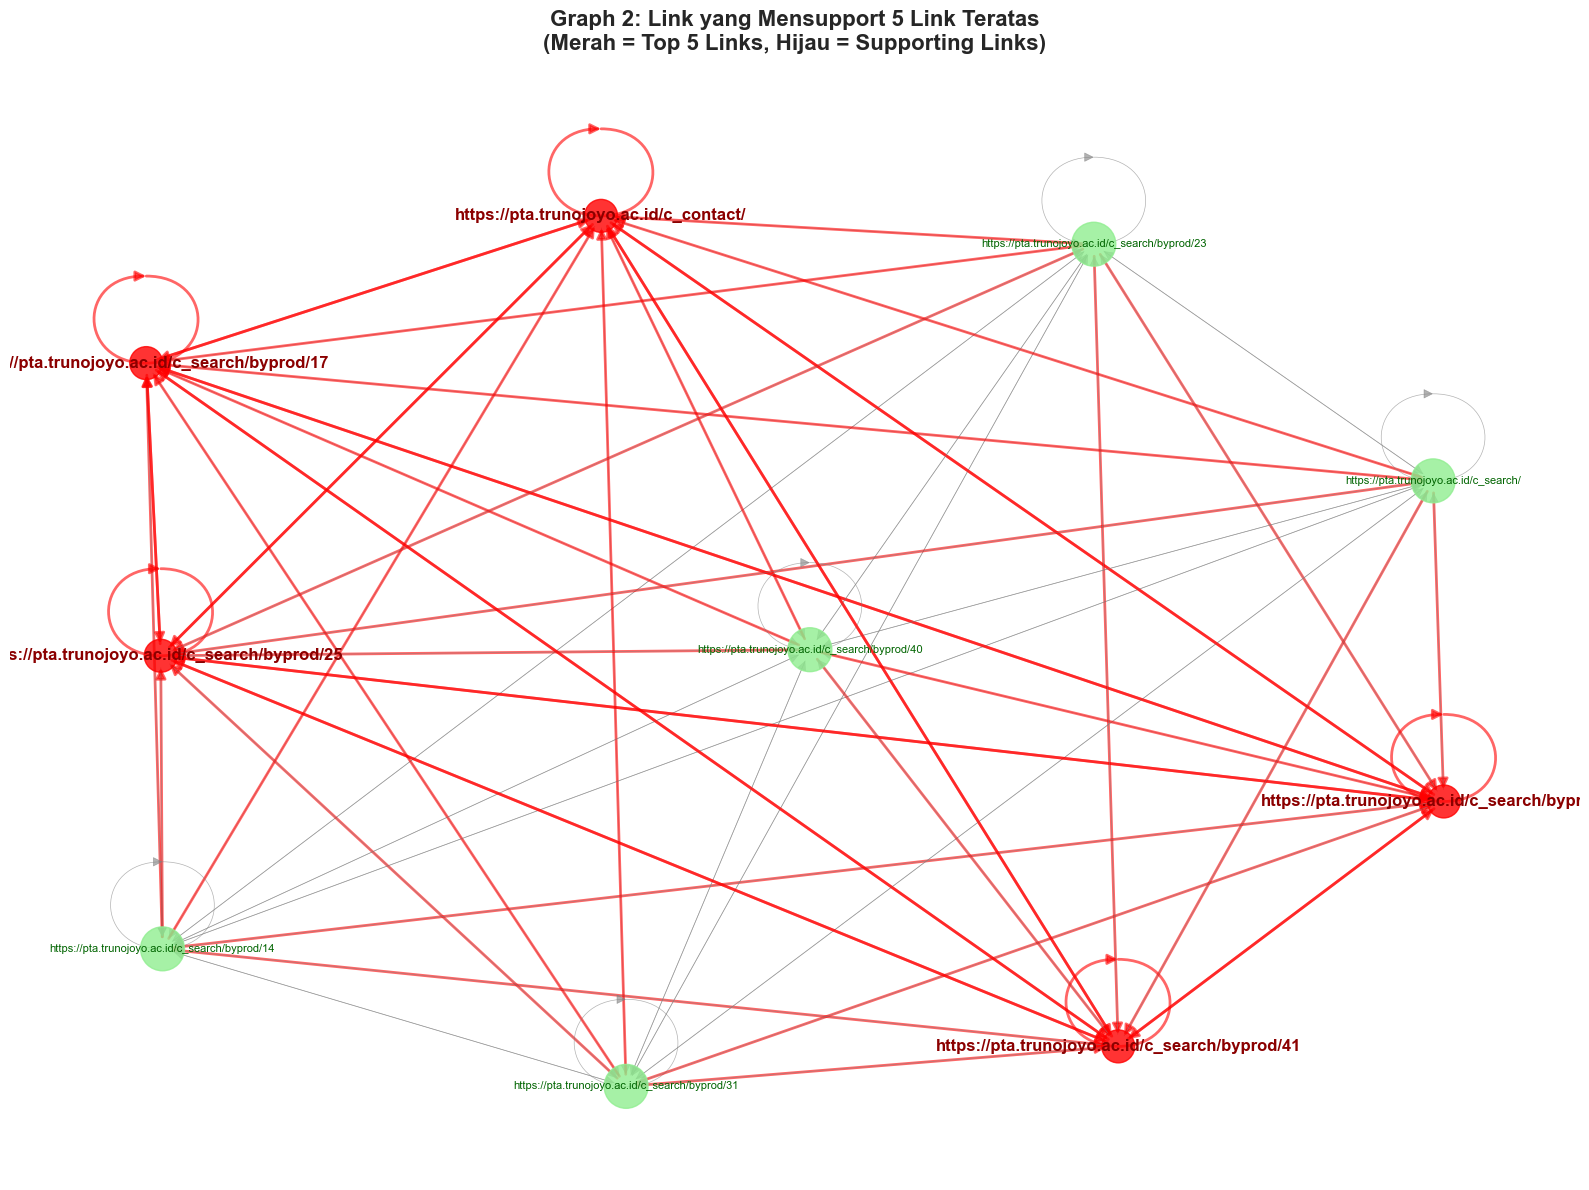

In [19]:
# Visualisasi Graph 2: Supporting Links
fig, ax = plt.subplots(figsize=(16, 12))

# Layout
pos2 = nx.spring_layout(subG2, k=1, iterations=100)

# Identifikasi node types
node_colors = []
node_sizes_list = []
for node in subG2.nodes():
    if node in top_nodes:
        # Top 5 nodes - color merah, size besar
        node_colors.append('red')
        idx = top_nodes.index(node)
        node_sizes_list.append(top_scores[idx] * 50000)
    else:
        # Supporting nodes - color hijau, size sedang
        node_colors.append('lightgreen')
        node_sizes_list.append(1000)

# Draw nodes
nx.draw_networkx_nodes(subG2, pos2, node_size=node_sizes_list,
                       node_color=node_colors, alpha=0.8, ax=ax)

# Draw edges - highlight edges ke top 5
edge_colors = []
edge_widths = []
for edge in subG2.edges():
    if edge[1] in top_nodes:
        edge_colors.append('red')
        edge_widths.append(2.0)
    else:
        edge_colors.append('gray')
        edge_widths.append(0.5)

nx.draw_networkx_edges(subG2, pos2, edge_color=edge_colors, 
                       width=edge_widths, arrows=True, arrowsize=15, 
                       alpha=0.6, ax=ax)

# Draw labels - hanya untuk top 5 dengan font besar
nx.draw_networkx_labels(subG2, pos2, 
                        {node: node for node in top_nodes},
                        font_size=12, font_weight='bold', 
                        font_color='darkred', ax=ax)

# Draw labels untuk supporting nodes dengan font lebih kecil
supporting_labels = {node: node for node in subG2.nodes() if node not in top_nodes}
nx.draw_networkx_labels(subG2, pos2, supporting_labels,
                        font_size=8, font_color='darkgreen', ax=ax)

# Add title dan legend
plt.title('Graph 2: Link yang Mensupport 5 Link Teratas\n(Merah = Top 5 Links, Hijau = Supporting Links)', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
# Tambahan: Statistical summary
print("\n=== STATISTIK SUMMARY ===")
print(f"Jumlah total nodes di graph: {G.number_of_nodes()}")
print(f"Jumlah total edges di graph: {G.number_of_edges()}")

# Count incoming edges untuk top 5
print("\n--- Incoming Edges untuk Top 5 Nodes ---")
for node, score in top_5_nodes:
    in_degree = G.in_degree(node)
    out_degree = G.out_degree(node)
    print(f"{node}:")
    print(f"  - PageRank: {score:.6f}")
    print(f"  - Incoming edges: {in_degree}")
    print(f"  - Outgoing edges: {out_degree}")
    
# Count unique supporting nodes per top 5 node
print("\n--- Supporting Nodes per Top 5 ---")
for node, _ in top_5_nodes:
    predecessors = list(G.predecessors(node))
    print(f"{node} disupport oleh {len(predecessors)} nodes")



=== STATISTIK SUMMARY ===
Jumlah total nodes di graph: 94
Jumlah total edges di graph: 580

--- Incoming Edges untuk Top 5 Nodes ---
https://pta.trunojoyo.ac.id/c_search/byprod/10:
  - PageRank: 0.011279
  - Incoming edges: 10
  - Outgoing edges: 62
https://pta.trunojoyo.ac.id/c_contact/:
  - PageRank: 0.011279
  - Incoming edges: 10
  - Outgoing edges: 54
https://pta.trunojoyo.ac.id/c_search/byprod/25:
  - PageRank: 0.011279
  - Incoming edges: 10
  - Outgoing edges: 62
https://pta.trunojoyo.ac.id/c_search/byprod/41:
  - PageRank: 0.011279
  - Incoming edges: 10
  - Outgoing edges: 54
https://pta.trunojoyo.ac.id/c_search/byprod/17:
  - PageRank: 0.011279
  - Incoming edges: 10
  - Outgoing edges: 62

--- Supporting Nodes per Top 5 ---
https://pta.trunojoyo.ac.id/c_search/byprod/10 disupport oleh 10 nodes
https://pta.trunojoyo.ac.id/c_contact/ disupport oleh 10 nodes
https://pta.trunojoyo.ac.id/c_search/byprod/25 disupport oleh 10 nodes
https://pta.trunojoyo.ac.id/c_search/byprod/41 d